In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
trader_df = pd.read_csv("/Users/samratgurav/Downloads/historical_data.csv")
sentiment_df = pd.read_csv("/Users/samratgurav/Downloads/fear_greed_index.csv")


In [17]:
trader_df.describe

<bound method NDFrame.describe of                                            Account      Coin  Execution Price  \
0       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9769   
1       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9800   
2       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9855   
3       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9874   
4       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9894   
...                                            ...       ...              ...   
211219  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211220  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211221  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211222  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211223  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.10

In [18]:
sentiment_df.describe

<bound method NDFrame.describe of        timestamp  value classification        date
0     1517463000     30           Fear  2018-02-01
1     1517549400     15           Fear  2018-02-02
2     1517635800     40           Fear  2018-02-03
3     1517722200     24           Fear  2018-02-04
4     1517808600     11           Fear  2018-02-05
...          ...    ...            ...         ...
2639  1745818200     54        Neutral  2025-04-28
2640  1745904600     60          Greed  2025-04-29
2641  1745991000     56          Greed  2025-04-30
2642  1746077400     53        Neutral  2025-05-01
2643  1746163800     67          Greed  2025-05-02

[2644 rows x 4 columns]>

In [19]:
trader_df.isnull().sum()


Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
date                0
dtype: int64

In [20]:
sentiment_df.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [21]:
trader_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
211219    False
211220    False
211221    False
211222    False
211223    False
Length: 211224, dtype: bool

In [22]:
sentiment_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2639    False
2640    False
2641    False
2642    False
2643    False
Length: 2644, dtype: bool

In [23]:
trader_df["Timestamp IST"] = pd.to_datetime(trader_df["Timestamp IST"], format="%d-%m-%Y %H:%M")
trader_df["date"] = trader_df["Timestamp IST"].dt.date

In [24]:
sentiment_df["date"] = pd.to_datetime(sentiment_df["date"]).dt.date

In [25]:
sentiment_df["classification"] = sentiment_df["classification"].replace({
    "Extreme Fear": "Fear",
    "Extreme Greed": "Greed"
})

In [26]:
merged_df = pd.merge(trader_df, sentiment_df[["date", "classification"]], on="date", how="inner")

In [27]:
merged_df["Closed PnL"] = pd.to_numeric(merged_df["Closed PnL"], errors="coerce")

In [28]:
summary_stats = merged_df.groupby("classification")["Closed PnL"].agg(["count", "mean", "median", "std", "min", "max"])
print("\n=== Trader Performance by Sentiment ===")
print(summary_stats)


=== Trader Performance by Sentiment ===
                count       mean  median         std           min  \
classification                                                       
Fear            83237  49.212077     0.0  990.875398  -35681.74723   
Greed           90295  53.882281     0.0  976.964281 -117990.10410   
Neutral         37686  34.307718     0.0  517.122220  -24500.00000   

                         max  
classification                
Fear            135329.09010  
Greed            74530.52371  
Neutral          48504.09555  


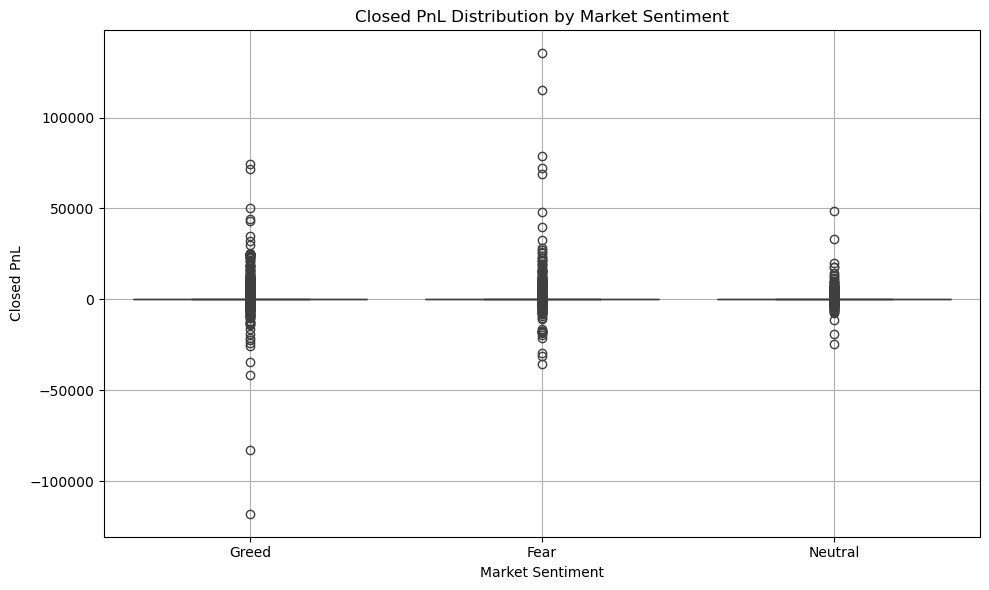

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x="classification", y="Closed PnL")
plt.title("Closed PnL Distribution by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Closed PnL")
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
numeric_cols = ["Closed PnL", "Execution Price", "Size USD", "Fee"]

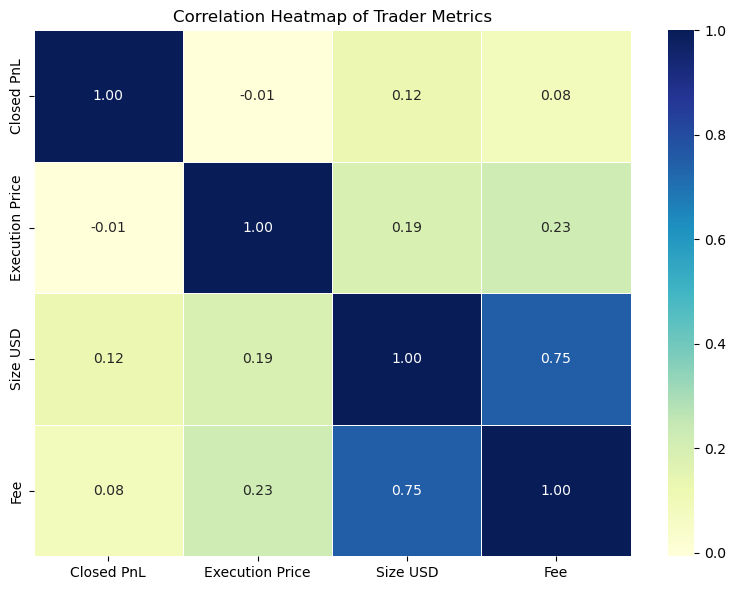

In [32]:
heatmap_data = merged_df[numeric_cols].dropna()
correlation_matrix = heatmap_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Trader Metrics")
plt.tight_layout()
plt.show()

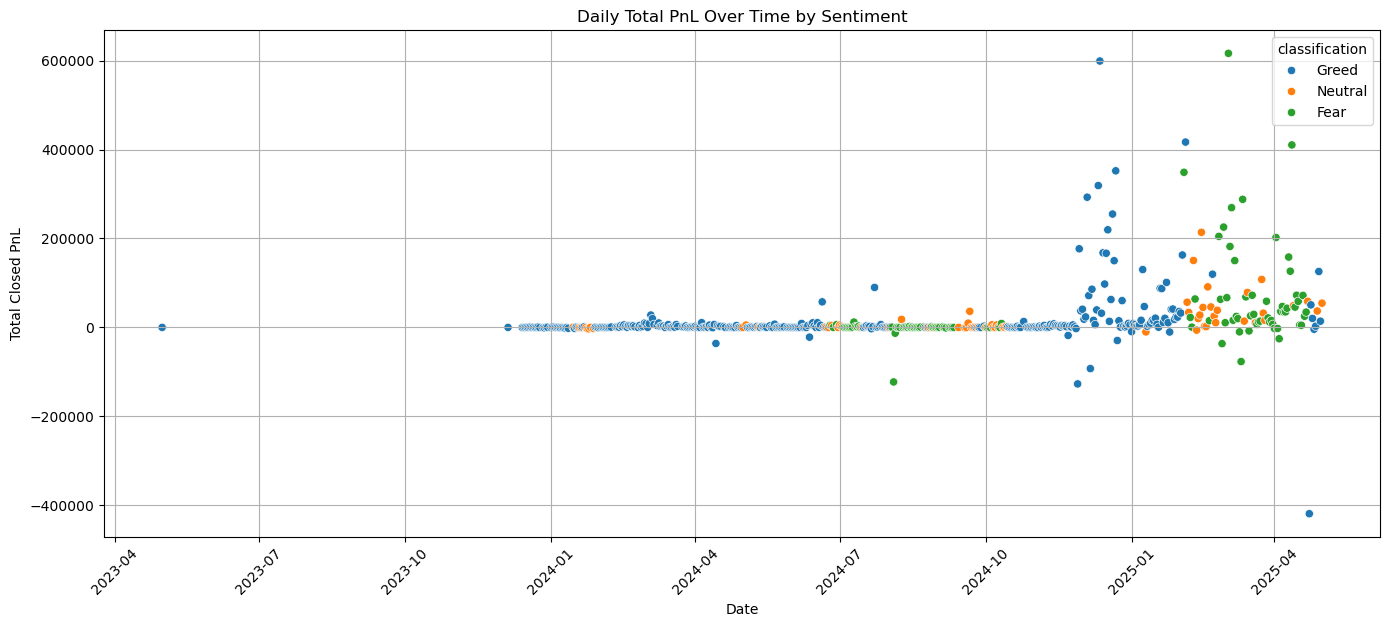

In [36]:
daily_pnl = merged_df.groupby(["date", "classification"])["Closed PnL"].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.scatterplot(data=daily_pnl, x="date", y="Closed PnL", hue="classification", marker="o")
plt.title("Daily Total PnL Over Time by Sentiment")
plt.xlabel("Date")
plt.ylabel("Total Closed PnL")
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()